In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2023-07-21 10:22:56.311045: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 10:22:56.349534: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 10:22:56.350186: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 10:22:57.057559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
#加载数据
(train_image,train_lable),(test_image,test_label)=tf.keras.datasets.fashion_mnist.load_data()

In [4]:
#训练数据
train_image.shape,train_lable.shape

((60000, 28, 28), (60000,))

In [5]:
#测试数据
test_image.shape,test_label.shape

((10000, 28, 28), (10000,))

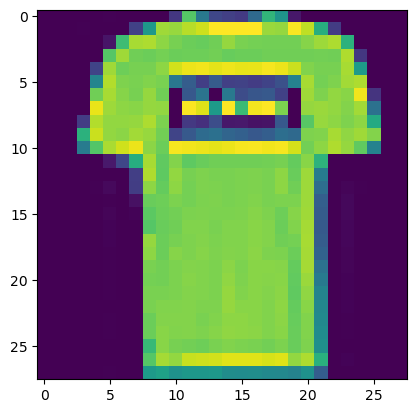

In [6]:
plt.imshow(train_image[1])

In [43]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [44]:
#创建模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#28*28 输入层
model.add(tf.keras.layers.Dense(128,activation='relu'))#隐藏层
model.add(tf.keras.layers.Dense(10,activation='softmax'))#输出层

In [45]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics='acc')

In [46]:
#训练模型
model.fit(train_image,train_lable,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.8112 - acc: 0.6787
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6655 - acc: 0.7565
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5604 - acc: 0.8015
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5318 - acc: 0.8156
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5159 - acc: 0.8202
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5041 - acc: 0.8247
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4951 - acc: 0.8280
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4880 - acc: 0.8302
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4828 - acc: 0.8318
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4772 - acc: 0.8347


In [48]:
#通过测试数据集对模型检测
model.evaluate(test_image,test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.5477 - acc: 0.8176


[0.5476852655410767, 0.8176000118255615]

**独热编码**

In [7]:
train_label_onthot = tf.keras.utils.to_categorical(train_lable)
test_label_onthot = tf.keras.utils.to_categorical(test_label)

In [50]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics='acc')

In [51]:
model.fit(train_image,train_label_onthot,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4809 - acc: 0.8344
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4824 - acc: 0.8322
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4695 - acc: 0.8364
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4691 - acc: 0.8365
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4611 - acc: 0.8384


In [52]:
#模型测试
predict=model.predict(test_image)

313/313 [==============================] - 0s 916us/step


In [53]:
test_image.shape,predict.shape

((10000, 28, 28), (10000, 10))

In [54]:
predict[0]

array([6.9578402e-30, 1.5653383e-21, 0.0000000e+00, 2.4431276e-25,
       0.0000000e+00, 3.2245556e-01, 0.0000000e+00, 7.8412723e-03,
       3.0038869e-15, 6.6970319e-01], dtype=float32)

In [55]:
#取出最大值
np.argmax(predict[0])

9

--------------------------------------------------------------

## 过拟合

In [8]:
#创建模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#28*28 输入层
model.add(tf.keras.layers.Dense(128,activation='relu'))#隐藏层
model.add(tf.keras.layers.Dense(128,activation='relu'))#隐藏层
model.add(tf.keras.layers.Dense(128,activation='relu'))#隐藏层
model.add(tf.keras.layers.Dense(10,activation='softmax'))#输出层

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [34]:
# history = model.fit(train_image,train_label_onthot,epochs=5)
# plt.plot(history.epoch,history.history.get('loss'))

In [15]:
history = model.fit(train_image,
                    train_label_onthot,
                    epochs=1000,
                   validation_data=(test_image,test_label_onthot))

Epoch 1/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2144 - acc: 0.9226 - val_loss: 0.7268 - val_acc: 0.8734
Epoch 2/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2328 - acc: 0.9187 - val_loss: 0.8300 - val_acc: 0.8715
Epoch 3/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2225 - acc: 0.9243 - val_loss: 1.2228 - val_acc: 0.8746
Epoch 4/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2207 - acc: 0.9213 - val_loss: 1.1066 - val_acc: 0.8746
Epoch 5/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2394 - acc: 0.9192 - val_loss: 1.0471 - val_acc: 0.8767
Epoch 6/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2138 - acc: 0.9249 - val_loss: 1.0969 - val_acc: 0.8727
Epoch 7/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2181 - acc: 0.9229 - val_loss: 0.9391 - val_acc: 0.8790
Epoch 8/1000
1875/1875 [========================

1875/1875 [==============================] - 9s 5ms/step - loss: 0.2310 - acc: 0.9253 - val_loss: 3.1163 - val_acc: 0.8654
Epoch 61/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2130 - acc: 0.9273 - val_loss: 2.4531 - val_acc: 0.8747
Epoch 62/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2183 - acc: 0.9255 - val_loss: 2.9906 - val_acc: 0.8568
Epoch 63/1000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2219 - acc: 0.9246 - val_loss: 2.7887 - val_acc: 0.8719
Epoch 64/1000
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2251 - acc: 0.9247 - val_loss: 2.5261 - val_acc: 0.8730
Epoch 65/1000
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1951 - acc: 0.9297 - val_loss: 3.5168 - val_acc: 0.8787
Epoch 66/1000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2207 - acc: 0.9237 - val_loss: 2.2311 - val_acc: 0.8718
Epoch 67/1000
1875/1875 [==========================

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2282 - acc: 0.9267 - val_loss: 3.9629 - val_acc: 0.8676
Epoch 120/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1915 - acc: 0.9334 - val_loss: 4.6870 - val_acc: 0.8720
Epoch 121/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2074 - acc: 0.9313 - val_loss: 4.7471 - val_acc: 0.8682
Epoch 122/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2148 - acc: 0.9293 - val_loss: 4.6339 - val_acc: 0.8725
Epoch 123/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1949 - acc: 0.9320 - val_loss: 5.3619 - val_acc: 0.8718
Epoch 124/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2948 - acc: 0.9142 - val_loss: 3.2136 - val_acc: 0.8651
Epoch 125/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2166 - acc: 0.9270 - val_loss: 4.6134 - val_acc: 0.8730
Epoch 126/1000
1875/1875 [=======================

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2931 - acc: 0.9208 - val_loss: 5.2318 - val_acc: 0.8236
Epoch 179/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3315 - acc: 0.9054 - val_loss: 11.2825 - val_acc: 0.8632
Epoch 180/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2837 - acc: 0.9234 - val_loss: 10.3552 - val_acc: 0.8717
Epoch 181/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2014 - acc: 0.9331 - val_loss: 11.5833 - val_acc: 0.8720
Epoch 182/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2563 - acc: 0.9277 - val_loss: 8.6501 - val_acc: 0.8703
Epoch 183/1000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2440 - acc: 0.9317 - val_loss: 8.7242 - val_acc: 0.8635
Epoch 184/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2333 - acc: 0.9247 - val_loss: 10.7926 - val_acc: 0.8697
Epoch 185/1000
1875/1875 [===================

KeyboardInterrupt: 

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

## 添加Dropout抑制过拟合
---

In [20]:
#创建模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#28*28 输入层
model.add(tf.keras.layers.Dense(128,activation='relu'))#全连接层
model.add(tf.keras.layers.Dropout(0.5))#丢弃层
model.add(tf.keras.layers.Dense(128,activation='relu'))#全连接层
model.add(tf.keras.layers.Dropout(0.5))#丢弃层
model.add(tf.keras.layers.Dense(128,activation='relu'))#全连接层
model.add(tf.keras.layers.Dropout(0.5))#丢弃层
model.add(tf.keras.layers.Dense(10,activation='softmax'))#全连接层

In [22]:
#查看模型
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [59]:
#编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'])

#运行模型
history = model.fit(train_image,train_label_onthot,epochs=10,
                   validation_data=(test_image,test_label_onthot))

#绘制损失数据
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6445 - acc: 0.7419 - val_loss: 0.7388 - val_acc: 0.7346
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6424 - acc: 0.7404 - val_loss: 0.6673 - val_acc: 0.7378
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6387 - acc: 0.7405 - val_loss: 0.6857 - val_acc: 0.7282
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6373 - acc: 0.7437 - val_loss: 0.6622 - val_acc: 0.7346
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6306 - acc: 0.7442 - val_loss: 0.6875 - val_acc: 0.7357
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6263 - acc: 0.7462 - val_loss: 0.7270 - val_acc: 0.7260
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6236 - acc: 0.7463 - val_loss: 0.7712 - val_acc: 0.7317
Epoch 8/10
1875/1875 [==============================] - 2s 1ms

## 缩小模型大小抑制过拟合

In [62]:
#创建模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#28*28 输入层
model.add(tf.keras.layers.Dense(32,activation='relu'))#隐藏层
model.add(tf.keras.layers.Dense(10,activation='softmax'))#输出层

#编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [63]:
#查看模型
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 32)                25120     
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.7507 - acc: 0.3586 - val_loss: 1.6358 - val_acc: 0.4104
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3410 - acc: 0.5052 - val_loss: 1.2727 - val_acc: 0.5777
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0453 - acc: 0.5965 - val_loss: 0.9994 - val_acc: 0.6385
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8493 - acc: 0.6703 - val_loss: 0.8781 - val_acc: 0.6743
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7293 - acc: 0.7163 - val_loss: 0.7319 - val_acc: 0.7236
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6933 - acc: 0.7270 - val_loss: 0.7034 - val_acc: 0.7314
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6754 - acc: 0.7303 - val_loss: 0.6889 - val_acc: 0.7238
Epoch 8/10
1875/1875 [==============================] - 3s 1ms

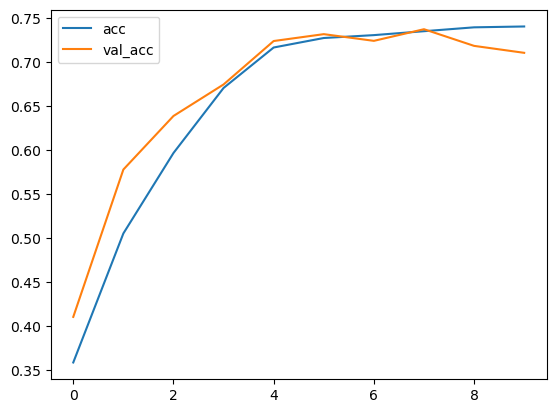

In [58]:
#运行模型
history = model.fit(train_image,train_label_onthot,epochs=10,
                   validation_data=(test_image,test_label_onthot))

#绘制损失数据
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()